# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

/Users/tommy/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 39s 3us/step


In [4]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [5]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [6]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
#宣告採用序列模型
model = Sequential()

In [9]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [10]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [12]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [13]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 69s 1ms/step - loss: 0.2702 - acc: 0.9225 - val_loss: 0.1328 - val_acc: 0.9623
Epoch 2/10
48000/48000 [==============================] - 77s 2ms/step - loss: 0.1079 - acc: 0.9680 - val_loss: 0.1041 - val_acc: 0.9696
Epoch 3/10
48000/48000 [==============================] - 78s 2ms/step - loss: 0.0714 - acc: 0.9779 - val_loss: 0.0934 - val_acc: 0.9729
Epoch 4/10
48000/48000 [==============================] - 72s 2ms/step - loss: 0.0516 - acc: 0.9837 - val_loss: 0.0808 - val_acc: 0.9768
Epoch 5/10
48000/48000 [==============================] - 66s 1ms/step - loss: 0.0372 - acc: 0.9875 - val_loss: 0.0821 - val_acc: 0.9753
Epoch 6/10
48000/48000 [==============================] - 66s 1ms/step - loss: 0.0265 - acc: 0.9919 - val_loss: 0.0795 - val_acc: 0.9773
Epoch 7/10
48000/48000 [==============================] - 68s 1ms/step - loss: 0.0193 - acc: 0.9941 - val_loss: 0.0848 - val_acc

# 以圖形顯示訓練過程

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

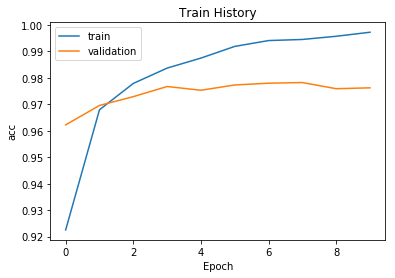

In [15]:
show_train_history(train_history,'acc','val_acc')

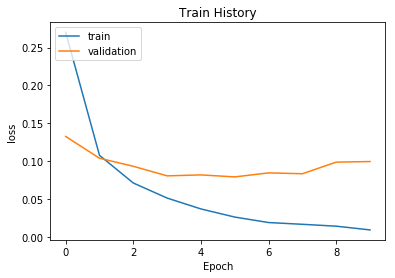

In [16]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [17]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 2s 203us/step

accuracy= 0.9789


# 作業:
    [練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
